In [104]:
import os

import numpy as np
import pandas as pd
import pygeohash as pgh

In [4]:
!ls ../datathon_materials

cell_coverage_dark_spots.csv  public_services_locations.csv
fuel_station_metrics.csv      road_impediments.csv.gz
government_finances.csv.gz    service_centre_metrics.csv
hazardous_driving_areas.csv   vehicle_activity.csv.gz
heavy_duty_parking.csv	      weather.csv.gz


In [79]:
os.makedirs('output')

# Functions

In [175]:
def distance(origin, destination):
    lat1, lon1 = origin
    lat2 = destination[:, 0]
    lon2 = destination[:, 1]
    EARTH_RADIUS = 6371.009

    dlat = np.radians(lat2-lat1)
    dlon = np.radians(lon2-lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) \
        * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = EARTH_RADIUS * c

    return d

In [183]:
def avg_min_distance(origin, destinations, ks=[1,2,3]):
    distances = distance(origin, destinations)
    return [np.average(np.sort(distances)[:k]) for k in ks]

In [ ]:
from geopy.distance import vincenty
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(vincenty(newport_ri, cleveland_oh).km)

In [ ]:
np.sort(distance(np.array([newport_ri[0], newport_ri[1]]), 
         np.array([[cleveland_oh[0], cleveland_oh[1]], 
                   [1000, 1000],
                   [cleveland_oh[0], cleveland_oh[1]]])))

# Load data

In [82]:
CITIES = {'Atlanta', 'Denver', 'Houston', 'Los Angeles', 'Raleigh', 'Durham', 'Toronto'}

## `vehicle_activity`

In [8]:
vehicle_activity = pd.read_csv('../datathon_materials/vehicle_activity.csv.gz')

/home/strokach/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
display(vehicle_activity.head(2))
print(vehicle_activity.shape)

,geohash,city,county,state,metro,average_idle_total,median_idle_total,cumulative_daily_idle_total,average_idle_car,average_idle_mpv,...,average_unique_geohashes,average_total_geohashes,circling_distribution,hourly_distribution_park,percent_car_park,percent_mpv_park,percent_ldt_park,percent_mdt_park,percent_hdt_park,percent_other_park
0,9mupmfr,NaN,NaN,NaN,"Los Angeles-Long Beach-Anaheim, CA",5.2605,4.3333,10.2818,0.0000,4.6642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9q5c4jz,NaN,NaN,NaN,"Los Angeles-Long Beach-Anaheim, CA",9.6581,5.8500,95.9575,8.5833,5.5725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(293437, 39)


### Keep cities

In [99]:
vehicle_activity = vehicle_activity[vehicle_activity['city'].isin(cities)]
assert not set(vehicle_activity['city']) ^ cities

In [100]:
display(vehicle_activity.head(2))
print(vehicle_activity.shape)

,geohash,city,county,state,metro,average_idle_total,median_idle_total,cumulative_daily_idle_total,average_idle_car,average_idle_mpv,...,average_unique_geohashes,average_total_geohashes,circling_distribution,hourly_distribution_park,percent_car_park,percent_mpv_park,percent_ldt_park,percent_mdt_park,percent_hdt_park,percent_other_park
21,9q5cu0z,Los Angeles,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",7.2526,5.9167,75.0995,8.1452,8.5813,...,5.0,8.0909,"{""9q5cu28"":0.01, ""9q5cu0z"":0.1714, ""9q5cu0x"":0...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.0909,0.2727,0.3636,0.0,0.0909,0.1818
57,9q5cf6b,Los Angeles,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",8.2758,7.1667,119.3317,5.5510,8.5748,...,4.0,6.0000,"{""9q5cf70"":0.1485, ""9q5cf4z"":0.113, ""9q5cf5p"":...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.2000,0.2000,0.4000,0.0,0.0000,0.2000


(78439, 39)


### Add lat / long

In [101]:
vehicle_activity['latitude'], vehicle_activity['longitude'] = list(zip(
    *vehicle_activity['geohash'].apply(pgh.decode)))

### Keep cities

In [35]:
cities = {'Atlanta', 'Denver', 'Houston', 'Los Angeles', 'Raleigh', 'Durham', 'Toronto'}

vehicle_activity = vehicle_activity[vehicle_activity['city'].isin(cities)]
assert not set(vehicle_activity['city']) ^ cities

In [36]:
display(vehicle_activity.head(2))
print(vehicle_activity.shape)

,geohash,city,county,state,metro,average_idle_total,median_idle_total,cumulative_daily_idle_total,average_idle_car,average_idle_mpv,...,average_unique_geohashes,average_total_geohashes,circling_distribution,hourly_distribution_park,percent_car_park,percent_mpv_park,percent_ldt_park,percent_mdt_park,percent_hdt_park,percent_other_park
21,9q5cu0z,Los Angeles,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",7.2526,5.9167,75.0995,8.1452,8.5813,...,5.0,8.0909,"{""9q5cu28"":0.01, ""9q5cu0z"":0.1714, ""9q5cu0x"":0...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.0909,0.2727,0.3636,0.0,0.0909,0.1818
57,9q5cf6b,Los Angeles,Los Angeles,California,"Los Angeles-Long Beach-Anaheim, CA",8.2758,7.1667,119.3317,5.5510,8.5748,...,4.0,6.0000,"{""9q5cf70"":0.1485, ""9q5cf4z"":0.113, ""9q5cf5p"":...","{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.2000,0.2000,0.4000,0.0,0.0000,0.2000


(78439, 39)


## `road_impediments`

In [26]:
road_impediments = pd.read_csv('../datathon_materials/road_impediments.csv.gz')

In [27]:
display(road_impediments.head(2))
print(road_impediments.shape)

,latitude,longitude,city,county,state,metro,average_acceleration,percent_vehicles_acceleration,average_monthly_vehicles,percent_car,percent_mpv,percent_ldt,percent_mdt,percent_hdt,percent_other
0,29.78146,-96.10690,San Felipe,Austin,Texas,"Houston-The Woodlands-Sugar Land, TX",1.5106,0.0132,177,0.0000,0.0791,0.2326,0.1349,0.0977,0.4557
1,29.78425,-96.21537,NaN,Austin,Texas,"Houston-The Woodlands-Sugar Land, TX",0.8030,0.0139,24,0.0256,0.0769,0.3590,0.0513,0.3590,0.1282


(11009591, 15)


### Keep cities

In [28]:
# Keep only five cities
cities = {'Atlanta', 'Denver', 'Houston', 'Los Angeles', 'Raleigh', 'Durham', 'Toronto'}

road_impediments = road_impediments[road_impediments['city'].isin(cities)]
assert not set(road_impediments['city']) ^ cities

In [29]:
display(road_impediments.head(2))
print(road_impediments.shape)

,latitude,longitude,city,county,state,metro,average_acceleration,percent_vehicles_acceleration,average_monthly_vehicles,percent_car,percent_mpv,percent_ldt,percent_mdt,percent_hdt,percent_other
12820,30.03159,-95.25556,Houston,Harris,Texas,"Houston-The Woodlands-Sugar Land, TX",0.2273,0.1935,31,0.0784,0.0588,0.0588,0.2157,0.4902,0.0981
12821,29.87077,-95.44213,Houston,Harris,Texas,"Houston-The Woodlands-Sugar Land, TX",0.7260,0.0033,499,0.0605,0.0782,0.1122,0.1223,0.3354,0.2914


(1865411, 15)


### Add geohash

In [30]:
# Add geohash tag
road_impediments['geohash'] = (
    road_impediments[['latitude', 'longitude']]
    .apply(lambda s: pgh.encode(s.latitude, s.longitude, 7), axis=1)
)

## `cell_coverage_dark_spots`

In [179]:
cell_coverage_dark_spots = pd.read_csv('../datathon_materials/cell_coverage_dark_spots.csv')

In [180]:
display(cell_coverage_dark_spots.head(2))
print(cell_coverage_dark_spots.shape)

,geohash,latitude,longitude,city,state,metro,average_drops_per_month,percent_affected,hourly_distribution
0,dnh7qpd,34.36370,-83.75655,Lula,Georgia,Atlanta,0.6413,0.0909,"{""00"": 0, ""01"": 0, ""02"": 0.9365, ""03"": 0, ""04""..."
1,djupuj4,33.73406,-84.19613,Redan,Georgia,Atlanta,0.5601,0.4000,"{""00"": 0.1702, ""01"": 0.5385, ""02"": 0.6154, ""03..."


(9945, 9)


In [181]:
# cell_coverage_dark_spots = cell_coverage_dark_spots[cell_coverage_dark_spots['city'].isin(CITIES)]
# assert not set(cell_coverage_dark_spots['city']) ^ CITIES, CITIES - set(cell_coverage_dark_spots['city'])

### Closest distance

In [190]:
(vehicle_activity['cell_coverage_dark_spot_k1'],
 vehicle_activity['cell_coverage_dark_spot_k3'],
 vehicle_activity['cell_coverage_dark_spot_k5']) = list(zip(*[
    avg_min_distance(origin, cell_coverage_dark_spots[['latitude', 'longitude']].values, [1,3,5])
    for origin in vehicle_activity[['latitude', 'longitude']].values]
))

## `fuel_station_metrics`

In [95]:
fuel_station_metrics = pd.read_csv('../datathon_materials/fuel_station_metrics.csv', encoding='cp1252')

In [96]:
display(fuel_station_metrics.head(2))
print(fuel_station_metrics.shape)

,geohash,latitude,longitude,city,county,state,metro,has_gas,has_diesel,hourly_distribution,percent_car,percent_mpv,percent_ldt,percent_mdt,percent_hdt,percent_other,popularity_score
0,dn5cc4g,34.07405,-84.67742,Acworth,Cobb,Georgia,Atlanta,1,1,"{""00"": null, ""01"": null, ""02"": null, ""03"": nul...",0.0000,0.4,0.0000,0.2000,0.2,0.2000,2
1,dn5cd3h,34.01985,-84.62184,Kennesaw,Cobb,Georgia,Atlanta,1,1,"{""00"": null, ""01"": null, ""02"": 0.0172, ""03"": n...",0.3621,0.0,0.3276,0.0345,0.0,0.2759,4


(1912, 17)


In [97]:
fuel_station_metrics = fuel_station_metrics[fuel_station_metrics['city'].isin(CITIES)]
assert not set(fuel_station_metrics['city']) ^ CITIES, CITIES - set(fuel_station_metrics['city'])

### Closest distances

In [105]:
fuel_station_metrics_distances = fuel_station_metrics[['latitude', 'longitude']].values

In [174]:
vehicle_activity['closest_fuel_station_k1'] = [
    avg_min_distance(origin, fuel_station_metrics_distances, 1)
    for origin in vehicle_activity[['latitude', 'longitude']].values
]

In [176]:
vehicle_activity['closest_fuel_station_k3'] = [
    avg_min_distance(origin, fuel_station_metrics_distances, 3)
    for origin in vehicle_activity[['latitude', 'longitude']].values
]

In [177]:
vehicle_activity['closest_fuel_station_k5'] = [
    avg_min_distance(origin, fuel_station_metrics_distances, 5)
    for origin in vehicle_activity[['latitude', 'longitude']].values
]

## `public_service_locations`

In [238]:
public_services_locations = pd.read_csv('../datathon_materials/public_services_locations.csv')

In [239]:
public_services_locations['city'] = public_services_locations['city'].str.title()

In [240]:
public_services_locations = public_services_locations[public_services_locations['city'].isin(CITIES)]
assert not set(public_services_locations['city']) ^ CITIES, CITIES - set(public_services_locations['city'])

In [241]:
cell_structure = public_services_locations[public_services_locations['cell_structure_type'].notnull()]

In [242]:
college = public_services_locations[public_services_locations['college_population'].notnull()]

In [243]:
hospital = public_services_locations[public_services_locations['hospital_beds'].notnull()]

In [244]:
sports_venue = public_services_locations[public_services_locations['sports_venue_size'].notnull()]

In [245]:
church = public_services_locations[public_services_locations['worship_members'].notnull()]

In [247]:
school = public_services_locations[public_services_locations['schools_students'].notnull()]

In [248]:
datasets = {
    'public_services_locations': public_services_locations,
    'cell_structure': cell_structure,
    'college': college,
    'hospital': hospital,
    'sports_venue': sports_venue,
    'church': church,
    'school': school
}

In [249]:
for dataset, df in datasets.items():
    print(dataset)
    (vehicle_activity[f'{dataset}_k1'],
     vehicle_activity[f'{dataset}_k3'],
     vehicle_activity[f'{dataset}_k5']) = list(zip(*[
        avg_min_distance(origin, df[['latitude', 'longitude']].values, [1,3,5])
        for origin in vehicle_activity[['latitude', 'longitude']].values]
    ))

public_services_locations
cell_structure
college
hospital
sports_venue
church
school


## `heavy_duty_parking`

In [202]:
heavy_duty_parking = pd.read_csv('../datathon_materials/heavy_duty_parking.csv')

In [203]:
CITIES = {'Atlanta', 'Denver', 'Durham', 'Houston', 'Los Angeles', 'Raleigh', 'Toronto'}

In [204]:
# heavy_duty_parking = heavy_duty_parking[heavy_duty_parking['city'].isin(cities)]
# assert not set(heavy_duty_parking['city']) ^ cities, cities - set(heavy_duty_parking['city'])

In [205]:
(vehicle_activity['heavy_duty_parking_k1'],
 vehicle_activity['heavy_duty_parking_k3'],
 vehicle_activity['heavy_duty_parking_k5']) = list(zip(*[
    avg_min_distance(origin, heavy_duty_parking[['latitude', 'longitude']].values, [1,3,5])
    for origin in vehicle_activity[['latitude', 'longitude']].values]
))

## `service_center_metrics`

In [210]:
service_center_metrics = pd.read_csv('../datathon_materials/service_centre_metrics.csv')

In [211]:
# service_center_metrics = service_center_metrics[service_center_metrics['city'].isin(cities)]
# assert not set(service_center_metrics['city']) ^ cities, cities - set(service_center_metrics['city'])

In [212]:
(vehicle_activity['service_center_metrics_k1'],
 vehicle_activity['service_center_metrics_k3'],
 vehicle_activity['service_center_metrics_k5']) = list(zip(*[
    avg_min_distance(origin, service_center_metrics[['latitude', 'longitude']].values, [1,3,5])
    for origin in vehicle_activity[['latitude', 'longitude']].values]
))

# Process data

## Save road impediments grouped by geohash

In [70]:
columns = [
    'average_acceleration', 'percent_vehicles_acceleration', 'average_monthly_vehicles', 
    'percent_car', 'percent_mpv', 'percent_ldt', 'percent_mdt', 'percent_hdt', 'percent_other',
]

road_impediments_gp = (
    road_impediments
    .groupby('geohash', as_index=False)
    [columns]
    .agg(['min', 'max', 'mean', 'median'])
)

In [71]:
display(road_impediments_gp.head(2))
print(road_impediments_gp.shape[0])

average_acceleration                           \
                         min     max      mean median   
geohash                                                 
9mgzg6w                  0.0  0.5535  0.202611    0.0   
9mgzg6x                  0.0  0.1830  0.026143    0.0   

        percent_vehicles_acceleration                           \
                                  min     max      mean median   
geohash                                                          
9mgzg6w                           0.0  0.5000  0.142211    0.0   
9mgzg6x                           0.0  0.0213  0.003043    0.0   

        average_monthly_vehicles       ...   percent_mdt         percent_hdt  \
                             min max   ...          mean  median         min   
geohash                                ...                                     
9mgzg6w                       10  16   ...      0.172044  0.1500      0.2308   
9mgzg6x                       10  17   ...      0.193871  0.1905      0.2308   

                                  percent_other                            
            max      mean  median           min     max      mean  median  
geohash                                                                    
9mgzg6w  0.4667  0.367478  0.3571        0.1429  0.3889  0.266822  0.2500  
9mgzg6x  0.3571  0.317643  0.3333        0.1429  0.2500  0.219471  0.2307  

[2 rows x 36 columns]

153396


In [72]:
road_impediments_gp.columns = ['-'.join(c) for c in road_impediments_gp.columns]

In [73]:
road_impediments_gp = road_impediments_gp.reset_index()

In [74]:
display(road_impediments_gp.head(2))
print(road_impediments_gp.shape[0])

,geohash,average_acceleration-min,average_acceleration-max,average_acceleration-mean,average_acceleration-median,percent_vehicles_acceleration-min,percent_vehicles_acceleration-max,percent_vehicles_acceleration-mean,percent_vehicles_acceleration-median,average_monthly_vehicles-min,...,percent_mdt-mean,percent_mdt-median,percent_hdt-min,percent_hdt-max,percent_hdt-mean,percent_hdt-median,percent_other-min,percent_other-max,percent_other-mean,percent_other-median
0,9mgzg6w,0.0,0.5535,0.202611,0.0,0.0,0.5000,0.142211,0.0,10,...,0.172044,0.1500,0.2308,0.4667,0.367478,0.3571,0.1429,0.3889,0.266822,0.2500
1,9mgzg6x,0.0,0.1830,0.026143,0.0,0.0,0.0213,0.003043,0.0,10,...,0.193871,0.1905,0.2308,0.3571,0.317643,0.3333,0.1429,0.2500,0.219471,0.2307


153396


In [75]:
len(set(road_impediments_gp['geohash']) & set(vehicle_activity['geohash']))

74178

In [81]:
road_impediments_gp.to_csv('output/road_impediments_gbgeo.csv.gz', compression='gzip')

## Save distances

In [268]:
vehicle_activity.to_csv('output/vehicle_activity_with_distances.csv.gz', compression='gzip', index=False)

In [269]:
vehicle_activity.shape

(78439, 74)

In [270]:
vehicle_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78439 entries, 21 to 293436
Data columns (total 74 columns):
geohash                         78439 non-null object
city                            78439 non-null object
county                          54786 non-null object
state                           78439 non-null object
metro                           78439 non-null object
average_idle_total              77560 non-null float64
median_idle_total               77560 non-null float64
cumulative_daily_idle_total     77560 non-null float64
average_idle_car                77560 non-null float64
average_idle_mpv                77560 non-null float64
average_idle_ldt                77560 non-null float64
average_idle_mdt                77560 non-null float64
average_idle_hdt                77560 non-null float64
hourly_distribution_idle        77560 non-null object
percent_car_idle                77560 non-null float64
percent_mpv_idle                77560 non-null float64
percent_ldt_idl

In [255]:
import matplotlib.pyplot as plt

(array([ 54786.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  23653.]),
 array([  1.68552171e-02,   8.61303464e+01,   1.72243838e+02,
          2.58357329e+02,   3.44470820e+02,   4.30584311e+02,
          5.16697802e+02,   6.02811293e+02,   6.88924785e+02,
          7.75038276e+02,   8.61151767e+02]),
 <a list of 10 Patch objects>)

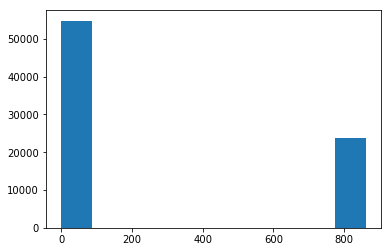

In [258]:
plt.hist(vehicle_activity['school_k1'])

(array([ 31203.,  10865.,   3475.,   1758.,   1213.,   1215.,    933.,
           885.,    714.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

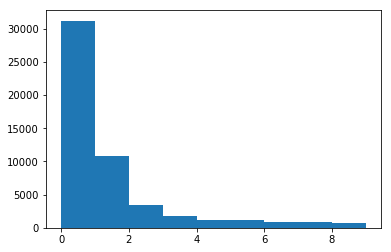

In [260]:
plt.hist(vehicle_activity['school_k1'], range(0, 10))

In [262]:
outliers = vehicle_activity[vehicle_activity['school_k1'] > 400]

In [263]:
set(outliers['city'])

{'Toronto'}

(array([ 37782.,   7076.,   1456.,   1939.,   1868.,   1953.,   1350.,
           710.,    400.,    252.]),
 array([  0.17614462,   2.35202767,   4.52791072,   6.70379377,
          8.87967682,  11.05555987,  13.23144293,  15.40732598,
         17.58320903,  19.75909208,  21.93497513]),
 <a list of 10 Patch objects>)

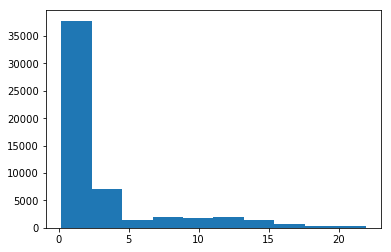

In [267]:
plt.hist(vehicle_activity[vehicle_activity['city'] != 'Toronto']['school_k5'])